In [9]:
!pip install BeautifulSoup


  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\arane\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\arane\\AppData\\Local\\Temp\\pip-install-1ar0kykt\\BeautifulSoup\\setup.py'"'"'; __file__='"'"'C:\\Users\\arane\\AppData\\Local\\Temp\\pip-install-1ar0kykt\\BeautifulSoup\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\arane\AppData\Local\Temp\pip-pip-egg-info-rpulgxha'
         cwd: C:\Users\arane\AppData\Local\Temp\pip-install-1ar0kykt\BeautifulSoup\
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\arane\AppData\Local\Temp\pip-install-1ar0kykt\BeautifulSoup\setup.py", line 3
        "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<

In [16]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

def scrap_webpage():
    webpage_url = "https://www.amazon.com.au/Bose-Noise-Cancelling-Headphones-700/dp/B07Q9MJKBV/ref=sr_1_1_sspa?crid=1466DE615ONBQ&dchild=1&keywords=bose+700&qid=1597125143&sprefix=bose+%2Caps%2C340&sr=8-1-spons&psc=1&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUEzM0NTTTlSNTJHSlhDJmVuY3J5cHRlZElkPUEwNDEyNzQ0REVVVjBUTVQyTE4mZW5jcnlwdGVkQWRJZD1BMjdWR0gzWllMVURWSiZ3aWRnZXROYW1lPXNwX2F0ZiZhY3Rpb249Y2xpY2tSZWRpcmVjdCZkb05vdExvZ0NsaWNrPXRydWU="
    page = urlopen(webpage_url)
    soup = BeautifulSoup(page, "html.parser")
    # search all html lines containing table data
    news_row = soup.find_all('tr', {'class': ['nn']})
    news = []
    for story in news_row:
        news.append(story.find('a').contents[0])

    df = pd.DataFrame.from_dict(news)

    def dataframe_sum_words(words, dataframe):
        summary = []
        for each in words:
            count = df[0].str.count('\\b'+each+'\\b', re.I).sum()
            summary.append([str(each), str(count)])
            summary_df = pd.DataFrame.from_records(summary, columns=['word','count'])
        return summary_df

    summary = dataframe_sum_words([ENTER_WORDS_OF_INTEREST], df)
    write_data = summary.to_csv(index=False)

    return write_data

In [17]:
scrap_webpage()

NameError: name 'ENTER_WORDS_OF_INTEREST' is not defined

In [35]:
import requests
from glob import glob 
from bs4 import BeautifulSoup
from datetime import datetime
from time import sleep


In [36]:
Headers = ({'User-Agent':
           'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',
           'Accept-Language':'en-US, en;q=0.5'})

In [37]:
product_tracker = pd.read_csv('TRACKER_PRODUCTS.csv',sep=';')
prod_URLS = product_tracker.url
product_tracker['url']

0    https://www.amazon.com.au/Bose-Noise-Cancellin...
Name: url, dtype: object

In [38]:
page = requests.get(prod_URLS[0], headers=Headers)

b'<!doctype html><html lang="en-au" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-fe.ssl-images-amazon.com">\n<link rel="preconnect" href="https://images-fe.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(funct
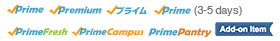
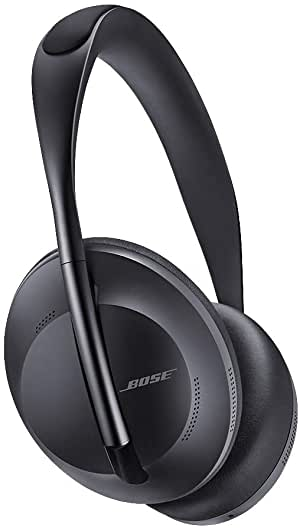

In [39]:
page.content

In [40]:
soup = BeautifulSoup(page.content, features="lxml")

In [57]:
float(soup.find(id='priceblock_ourprice').getText().strip().replace("$","").strip())

484.0

In [58]:
try:
    price = float(soup.find(id='priceblock_ourprice').getText().strip().replace("$","").strip())
except:
    price = ''

In [59]:
price

484.0

In [75]:
#review score
review_score = float(soup.select('#averageCustomerReviews_feature_div')[0].i.get_text().split(' ')[0])
review_score

4.4

In [102]:
#review score
review_score = int(soup.select('#acrCustomerReviewText')[0].get_text().split(' ')[0].replace(",",""))
review_score

4689